# TEST NOTEBOOK

In [1]:
from utils import find_coeffs, print_code
import inspect
from subprocess import check_output
from IPython.core.display import HTML

output = print_code(find_coeffs)
HTML(output)

In [22]:
print(inspect.getsource(find_coeffs))

def find_coeffs(pa, pb): # https://stackoverflow.com/questions/14177744/how-does-perspective-transformation-work-in-pil
    matrix = []
    for p1, p2 in zip(pa, pb):
        matrix.append([p1[0], p1[1], 1, 0, 0, 0, -p2[0]*p1[0], -p2[0]*p1[1]])
        matrix.append([0, 0, 0, p1[0], p1[1], 1, -p2[1]*p1[0], -p2[1]*p1[1]])

    A = np.matrix(matrix, dtype=float)
    B = np.array(pb).reshape(8)

    res = np.dot(np.linalg.inv(A.T * A) * A.T, B)
    return np.array(res).reshape(8)



In [23]:
from utils import find_coeffs
import inspect
from subprocess import check_output
from IPython.core.display import HTML

output = check_output(["pygmentize", "-f", "html", "-O", "noclasses,lineanchors,linenos,style=native", "-l", "python"],
                     input=inspect.getsource(find_coeffs), encoding='ascii')

# Define a custom CSS class to align the code to the left
custom_css = """
<style>
.code {
    text-align: left;
    background-color: black; /* Set the background color */
    }
</style>
"""

# Embed the code block in a div with the custom CSS class
html_code = f"""
{custom_css}
<div class="code">
{output}
</div>
"""

HTML(html_code)


1 2 3 4 5 6 7 8 9 10 11


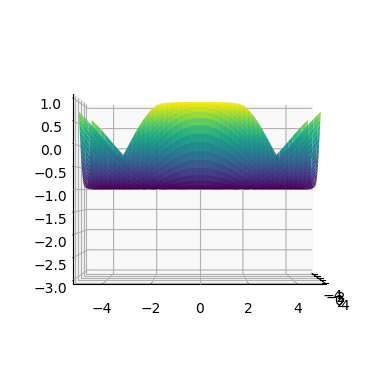

In [24]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

# Create some example data
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = np.sin(np.sqrt(X**2 + Y**2))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Set the view angles using view_init
ax.view_init(azim=0, elev=0)

# Set the view coordinates by adjusting the axis limits
ax.set_xlim(-5, 5)
ax.set_ylim(-5, 5)
ax.set_zlim(-3, 1)

# Plot the 3D surface
ax.plot_surface(X, Y, Z, cmap='viridis')

plt.show()


In [25]:
def generate_range(mean, height):
    # Calculate the lower and upper bounds for the range
    lower_bound = min(0, 2*mean - height)
    upper_bound = max(height, 2*mean)
    
    # Return the range as a tuple
    return (lower_bound, upper_bound)

mean_value = -2
height_value = 10
result_range = generate_range(mean_value, height_value)
print(result_range)

(-14, 10)


In [26]:
from subprocess import check_output
from IPython.display import HTML
import inspect

def pygmentize_source_code(source_code, language="python"):
    # Define the Pygmentize command and arguments
    command = ["pygmentize", "-f", "html", "-O", "noclasses, lineanchors,style=native", "-l", language]

    # Get the HTML output using check_output
    output = check_output(command, input=source_code, encoding="ascii")

    # Display the HTML using IPython.display
    return HTML(output)

# Example usage:
# def find_coeffs(x, y):
#     return x + y

source_code = inspect.getsource(find_coeffs)
html_output = pygmentize_source_code(source_code, language="python")
html_output


In [6]:
import numpy as np

def calculate_points(direction, radius, turbine_origin):
    angle = np.deg2rad(direction)  # Convert direction to radians if necessary
    x_offset = radius * np.cos(angle)
    y_offset = radius * np.sin(angle)

    point1 = np.array([turbine_origin[0] - x_offset, turbine_origin[1] - y_offset, 0])
    point2 = np.array([turbine_origin[0] + x_offset, turbine_origin[1] + y_offset, 0])

    return point1, point2

# Example usage:
direction = 180  # Angle in degrees
radius = 10  # Radius
turbine_origin = np.array([0, 0, 0])  # Origin point

point1, point2 = calculate_points(direction, radius, turbine_origin)
print("Point 1:", point1)
print("Point 2:", point2)


Point 1: [ 1.0000000e+01 -1.2246468e-15  0.0000000e+00]
Point 2: [-1.0000000e+01  1.2246468e-15  0.0000000e+00]


In [18]:
import numpy as np
object_position = np.array([1, -1])  # Replace with your own vector
scale_factor = 1

def object_frame_boundaries(object_position, scale_factor):

    object_position_normalized = object_position / np.linalg.norm(object_position)

    # Calculate two perpendicular vectors with a total length of 1
    perpendicular_vector1 = np.array([-object_position_normalized[1], object_position_normalized[0]])
    perpendicular_vector2 = np.array([object_position_normalized[1], -object_position_normalized[0]])

    # Scale the perpendicular vectors to have a total length of scale_factor
    scale_factor = 1 / np.linalg.norm(perpendicular_vector1)
    perpendicular_vector1 *= scale_factor
    perpendicular_vector2 *= scale_factor

    # Calculate the end positions of the perpendicular vectors
    end_position1 = object_position + perpendicular_vector1
    end_position2 = object_position + perpendicular_vector2
    return end_position1, end_position2

end_position1, end_position2 = object_frame_boundaries(object_position, scale_factor)
print("End position of perpendicular vector 1:", end_position1)
print("End position of perpendicular vector 2:", end_position2)


End position of perpendicular vector 1: [ 1.70710678 -0.29289322]
End position of perpendicular vector 2: [ 0.29289322 -1.70710678]


In [43]:
import numpy as np
object_position = np.array([2, -2.0])  # Replace with your own vector
scale_factor = 5

def object_frame_boundaries(object_position, scale_factor):
    perp_vector = np.array([-object_position[1], object_position[0]])
    perp_vector = perp_vector/(np.linalg.norm(perp_vector) / scale_factor)
    return object_position + perp_vector, object_position - perp_vector
end_position1, end_position2 = object_frame_boundaries(object_position, scale_factor)
print("End position of perpendicular vector 1:", end_position1)
print("End position of perpendicular vector 2:", end_position2)

End position of perpendicular vector 1: [5.53553391 1.53553391]
End position of perpendicular vector 2: [-1.53553391 -5.53553391]
